In [72]:
import pandas as pd
import numpy as np
import time
import sys

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn import svm

module_path='/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Experiment(Supervised Learning)/evaluation/'
if module_path not in sys.path:
    sys.path.append(module_path)
    
from integrating_embedding import *

import integrating_embedding
from imp import reload
reload(integrating_embedding)

module_path='/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Experiment(Supervised Learning)/evaluation/'
if module_path not in sys.path:
    sys.path.append(module_path)

import get_hospital_eicu


emb_path_trn_mimic = '/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Cohort_selection/Train/result/emb_train_new_version.npy'
emb_path_vld_mimic = '/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Cohort_selection/Train/result/emb_valid_new_version.npy'
emb_path_event_mimic = '/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Cohort_selection/Train/result/emb_event_new_version.npy'

emb_path_trn_eicu = '/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Cohort_selection/Train/result/emb_eicu_new_version.npy'

mimic_path = '/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Case Labeling/mimic_analysis.csv.gz'
eicu_path = '/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Case Labeling/eicu_analysis.csv.gz'

mimic_train_emb, mimic_valid_emb, event, event_emb = integrating_embedding.integrating(mimic_path, emb_path_trn_mimic, emb_path_vld_mimic, emb_path_event_mimic, 'mimic')
eicu_test_emb, event_eicu, hosp_id = integrating_embedding.integrating(eicu_path, emb_path_trn_eicu, _, _, 'eicu')
eicu_type = get_hospital_eicu.eicu_subgroup(eicu_test_emb)
unitadmitsource, unittype, unitstaytype = get_hospital_eicu.make_eicu_dataset(eicu_type)

========== 데이터셋 분할 정보 ==========
데이터셋 비율: 학습 = 0.90, 테스트 = 0.10
학습셋 클래스 비율: 1.0    473941
2.0      5128
3.0     11145
4.0     19613
Name: Case, dtype: int64
테스트셋 클래스 비율: 1.0    53103
2.0      512
3.0      873
4.0     1590
Name: Case, dtype: int64
--------------------------------------
========== 클래스 비율 ==========
학습셋 클래스 비율: 0.93:0.01:0.02:0.04
테스트셋 클래스 비율: 0.95:0.01:0.02:0.03
--------------------------------------
========== 환자 및 체류 정보 ==========
학습셋 환자 수: 2907
테스트셋 환자 수: 329
학습셋 체류 수: 2961
테스트셋 체류 수: 330
--------------------------------------
========== 실험 설정 ==========
분할 시드: 9040
학습 비율: 0.9
임계값: 0.05
--------------------------------------
========== 실행 결과 ==========
총 소요 시간(초): 0.37
시도한 시행 횟수: 0


In [73]:
module_path='/Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Experiment(Supervised Learning)/evaluation/'
if module_path not in sys.path:
    sys.path.append(module_path)

import split
from imp import reload
reload(split)

import Multiclass_evaluation
reload(Multiclass_evaluation)

<module 'Multiclass_evaluation' from 'c:\\Users/DAHS/Desktop/ECP_CONT/ECP_SCL/Experiment(Supervised Learning)/evaluation\\Multiclass_evaluation.py'>

In [74]:
X_train, y_train, output = split.split_X_Y(mimic_train_emb, mode = 'mimic')
X_valid, y_valid, valid_output = split.split_X_Y(mimic_valid_emb, mode = 'mimic')

In [75]:
reload(Multiclass_evaluation)
models, result = Multiclass_evaluation.create_analysis(event, X_train, y_train, X_valid, valid_output, mode = 'emb')

|MIMIC-Validation|====================================================


,Model,Accuracy,Case 1 AUROC,Case 1 AUPRC,Case 2 AUROC,Case 2 AUPRC,Case 3 AUROC,Case 3 AUPRC,Case 4 AUROC,Case 4 AUPRC,Case 1 Score,Case 2 Score,Case 3 Score,Case 4 Score
0,lgbm,0.984878,0.9335,0.9963,0.6223,0.3247,0.9198,0.8470,0.9579,0.9171,0.9945,0.7663,0.8458,0.9159
1,rf,0.983826,0.9309,0.9962,0.6076,0.2954,0.9098,0.8229,0.9492,0.9032,0.9944,0.7464,0.8215,0.9018
2,dt,0.974072,0.9329,0.9962,0.6381,0.2439,0.8452,0.7199,0.9309,0.8541,0.9908,0.7430,0.7167,0.8519
3,lr,0.947270,0.5106,0.9740,0.5000,0.5046,0.5037,0.1063,0.5090,0.3453,0.9732,0.0000,0.0154,0.0355


----------------------------------------------------------------------


In [182]:
reload(Multiclass_evaluation)
models, result = Multiclass_evaluation.create_analysis(event, X_train, y_train, X_valid, valid_output, mode = 'emb')

|MIMIC-Validation|====================================================


,Model,Accuracy,Case 1 AUROC,Case 1 AUPRC,Case 2 AUROC,Case 2 AUPRC,Case 3 AUROC,Case 3 AUPRC,Case 4 AUROC,Case 4 AUPRC,Case 1 Score,Case 2 Score,Case 3 Score,Case 4 Score
0,lgbm,0.984878,0.9335,0.9963,0.6223,0.3247,0.9198,0.8470,0.9579,0.9171,0.9945,0.7663,0.8458,0.9159
1,rf,0.983826,0.9309,0.9962,0.6076,0.2954,0.9098,0.8229,0.9492,0.9032,0.9944,0.7464,0.8215,0.9018
2,dt,0.974072,0.9329,0.9962,0.6381,0.2439,0.8452,0.7199,0.9309,0.8541,0.9908,0.7430,0.7167,0.8519
3,lr,0.947270,0.5106,0.9740,0.5000,0.5046,0.5037,0.1063,0.5090,0.3453,0.9732,0.0000,0.0154,0.0355


----------------------------------------------------------------------


In [78]:
reload(Multiclass_evaluation)
result_external = Multiclass_evaluation.external_evaluation(unitadmitsource, unittype, unitstaytype, models[0], 'LightGBM', event_eicu)

[Starting eICU-Test]
eICU-UnitAdmitSource...
eICU-UnitType...
eICU-UnitStayType...


Model  Accuracy  Case 1 AUROC  \
Subpopulation   eICU Type                                                
UnitAdmitSource Floor                 LightGBM  0.985903        0.9097   
                Acute Care/Floor      LightGBM  0.986931        0.8915   
                Emergency Department  LightGBM  0.986455        0.9181   
                Direct Admit          LightGBM  0.992583        0.9146   
                Operating Room        LightGBM  0.991844        0.9320   
                Step-Down Unit (SDU)  LightGBM  0.986832        0.8945   
                Other ICU             LightGBM  0.988933        0.8580   
                Recovery Room         LightGBM  0.991552        0.9554   
                Other Hospital        LightGBM  0.992664        0.9322   
                ICU                   LightGBM  0.988781        0.8374   
                Chest Pain Center     LightGBM  0.957233        0.8287   
                PACU                  LightGBM  0.989558        0.9557   
UnitType        Med-Surg ICU          LightGBM  0.988280        0.9188   
                MICU                  LightGBM  0.988949        0.9172   
                Cardiac ICU           LightGBM  0.988517        0.9101   
                Neuro ICU             LightGBM  0.993319        0.9032   
                CTICU                 LightGBM  0.989461        0.8940   
                CSICU                 LightGBM  0.977949        0.9065   
                CCU-CTICU             LightGBM  0.987253        0.8985   
                SICU                  LightGBM  0.990463        0.9426   
UnitStayType    admit                 LightGBM  0.988741        0.9172   
                transfer              LightGBM  0.986765        0.9130   
                readmit               LightGBM  0.988983        0.9128   
                stepdown/other        LightGBM  0.992522        0.4990   

                                      Case 1 AUPRC  Case 2 AUROC  \
Subpopulation   eICU Type                                          
UnitAdmitSource Floor                       0.9956        0.5359   
                Acute Care/Floor            0.9959        0.5701   
                Emergency Department        0.9966        0.5438   
                Direct Admit                0.9978        0.5336   
                Operating Room              0.9979        0.5282   
                Step-Down Unit (SDU)        0.9949        0.5534   
                Other ICU                   0.9966        0.5388   
                Recovery Room               0.9987        0.5648   
                Other Hospital              0.9978        0.5344   
                ICU                         0.9968        0.5420   
                Chest Pain Center           0.9888        0.4923   
                PACU                        0.9950        0.5409   
UnitType        Med-Surg ICU                0.9967        0.5492   
                MICU                        0.9967        0.5468   
                Cardiac ICU                 0.9961        0.5349   
                Neuro ICU                   0.9981        0.5180   
                CTICU                       0.9979        0.5207   
                CSICU                       0.9945        0.5290   
                CCU-CTICU                   0.9962        0.5435   
                SICU                        0.9974        0.5371   
UnitStayType    admit                       0.9969        0.5412   
                transfer                    0.9965        0.5475   
                readmit                     0.9964        0.5363   
                stepdown/other              0.9973        0.4990   

                                      Case 2 AUPRC Case 3 AUROC Case 3 AUPRC  \
Subpopulation   eICU Type                                                      
UnitAdmitSource Floor                       0.1147       0.9387       0.9043   
                Acute Care/Floor            0.1891       0.9476       0.9171   
                Emergency D

In [81]:
result_external.to_excel(excel_writer='external_validation_proposed_method.xlsx')

In [ ]:
# class 갯수가 많은 애들은 contrastive 쓰나 마나 똑같음 -> 원본데이터로도 충분히 정보가 있음
# 하지만 contrastive 를 씀으로써 맞추기 힘든 case 2를 잘 맞출 수 있게 됨 -> 모든 모델에서 모두 상승함
# contastive learning이 데이터 불균형 상황이더라도, 소수 클래스에 대해서 적합을 잘할 수 있음

# 이를 바탕으로 쇼크 모니터링 시스템을 개발함
# 베스 이스라엘 뿐 아니라, 다른 다양한 병원에서도 잘 적합하는 시스템을 개발하기 위해 본 연구에서는 eicu 데이터를 활용
# 따라서 eicu 2014를 이용해 시스템을 개발하고, 성능 평가를 위해 2015 데이터를 활용
# 가장 성능이 좋았던 모델을 기반으로 시스템을 개발

### Tracking system

In [283]:
#tracking system
reload(split)

X_viz, y_train_viz, output_viz = split.split_X_Y_for_VIZ(mimic_train_emb, mode = 'mimic')

lgbm_wrapper = LGBMClassifier(n_estimators=10, random_state=42, extra_trees = True, verbose=-1)
lgbm_wrapper.fit(X_viz, y_train_viz)

preds = lgbm_wrapper.predict(X_viz)
output_viz['prediction_label'] = preds
output_viz['prediction_prob_case2'] = lgbm_wrapper.predict_proba(X_viz)[:, 1]
output_viz['prediction_prob_case4'] = lgbm_wrapper.predict_proba(X_viz)[:, 3]

In [179]:
from sklearn.metrics import classification_report

In [268]:
def min_max_scaling(column):
    min_value = column.min()
    max_value = column.max()
    scaled_column = (column - min_value) / (max_value - min_value)
    return scaled_column

In [285]:
f1_scores = {}

# 유니크한 stay_id 별로 반복
for stay_id in output_viz['stay_id'].unique():
    interest = output_viz[output_viz['stay_id'] == stay_id]
    interest
    report = classification_report(interest.Case, interest.prediction_label, output_dict=True)
    report_int_keys = {int(float(k)): v for k, v in report.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
    if 3 in interest.Case.values:
        case34_f1 = np.round(report_int_keys[3]['f1-score'], 4) if 3 in report_int_keys else np.nan
    else:
        case34_f1 = np.nan
        
    if 2 in interest.Case.values:
        case2_f1 = np.round(report_int_keys[2]['f1-score'], 4) if 2 in report_int_keys else np.nan
    else:
        case2_f1 = np.nan

    f1_scores[stay_id] = (case34_f1 + case2_f1) / 2

high_f1_stay_ids = [stay_id for stay_id, f1 in f1_scores.items() if f1 >= 0.9]

In [191]:
high_f1_stay_ids

[36438264,
 34063284,
 37545217,
 32367987,
 36226794,
 31885285,
 30690523,
 36932912,
 35114774,
 32026706,
 32821521,
 32551329,
 39817695,
 33150173,
 30201512,
 36181972,
 31766968,
 31308486,
 33922130,
 32620013]

In [298]:
interest = output_viz[output_viz['stay_id'] == high_f1_stay_ids[2]]
interest

,stay_id,Time_since_ICU_admission,vasoactive/inotropic,Fluids(ml),Annotation,progress,Case,INDEX,Lactate_clearance_3h,prediction_label,prediction_prob_case2,prediction_prob_case4
76447,37545217,0,0,2.498250e+06,no_circ,0,1,CASE1_CASE2_DF,0.0,1.0,0.002392,0.008812
76448,37545217,1,0,2.498250e+06,no_circ,0,1,CASE1_CASE2_DF,0.0,1.0,0.002392,0.008812
76449,37545217,2,0,2.498250e+06,no_circ,0,1,CASE1_CASE2_DF,0.0,1.0,0.002357,0.008684
76450,37545217,3,0,2.498250e+06,no_circ,0,1,CASE1_CASE2_DF,0.0,1.0,0.002375,0.008812
76451,37545217,4,0,2.498250e+06,no_circ,0,1,CASE1_CASE2_DF,0.0,1.0,0.002375,0.008812
...,...,...,...,...,...,...,...,...,...,...,...,...
485085,37545217,123,1,2.430117e+05,ambiguous,1,4,CASE3_CASE4_DF,0.0,4.0,0.005658,0.841680
485086,37545217,124,1,5.186293e+05,ambiguous,1,4,CASE3_CASE4_DF,0.0,4.0,0.005658,0.841680
485087,37545217,125,1,5.185244e+05,ambiguous,1,4,CASE3_CASE4_DF,0.0,4.0,0.005661,0.842070
485088,37545217,126,1,5.185243e+05,ambiguous,1,4,CASE3_CASE4_DF,0.0,4.0,0.005658,0.841680


In [299]:
interest[interest['Case']==2]

,stay_id,Time_since_ICU_admission,vasoactive/inotropic,Fluids(ml),Annotation,progress,Case,INDEX,Lactate_clearance_3h,prediction_label,prediction_prob_case2,prediction_prob_case4
76493,37545217,46,0,2.490480e+06,no_circ,0,2,CASE1_CASE2_DF,0.0,2.0,0.576098,0.019566
76494,37545217,47,0,2.490499e+06,no_circ,0,2,CASE1_CASE2_DF,0.0,2.0,0.584286,0.019844
76495,37545217,48,0,2.490499e+06,no_circ,0,2,CASE1_CASE2_DF,0.0,2.0,0.553097,0.018785
76496,37545217,49,0,2.490249e+06,no_circ,0,2,CASE1_CASE2_DF,0.0,2.0,0.555983,0.018664
76497,37545217,50,0,2.490249e+06,no_circ,0,2,CASE1_CASE2_DF,0.0,2.0,0.555983,0.018664
76498,37545217,51,1,2.490264e+06,ambiguous,0,2,CASE1_CASE2_DF,0.0,2.0,0.562854,0.016932
76499,37545217,52,1,2.490264e+06,ambiguous,0,2,CASE1_CASE2_DF,0.0,2.0,0.524726,0.015785
76500,37545217,53,1,2.490299e+06,ambiguous,0,2,CASE1_CASE2_DF,0.0,2.0,0.567217,0.017063


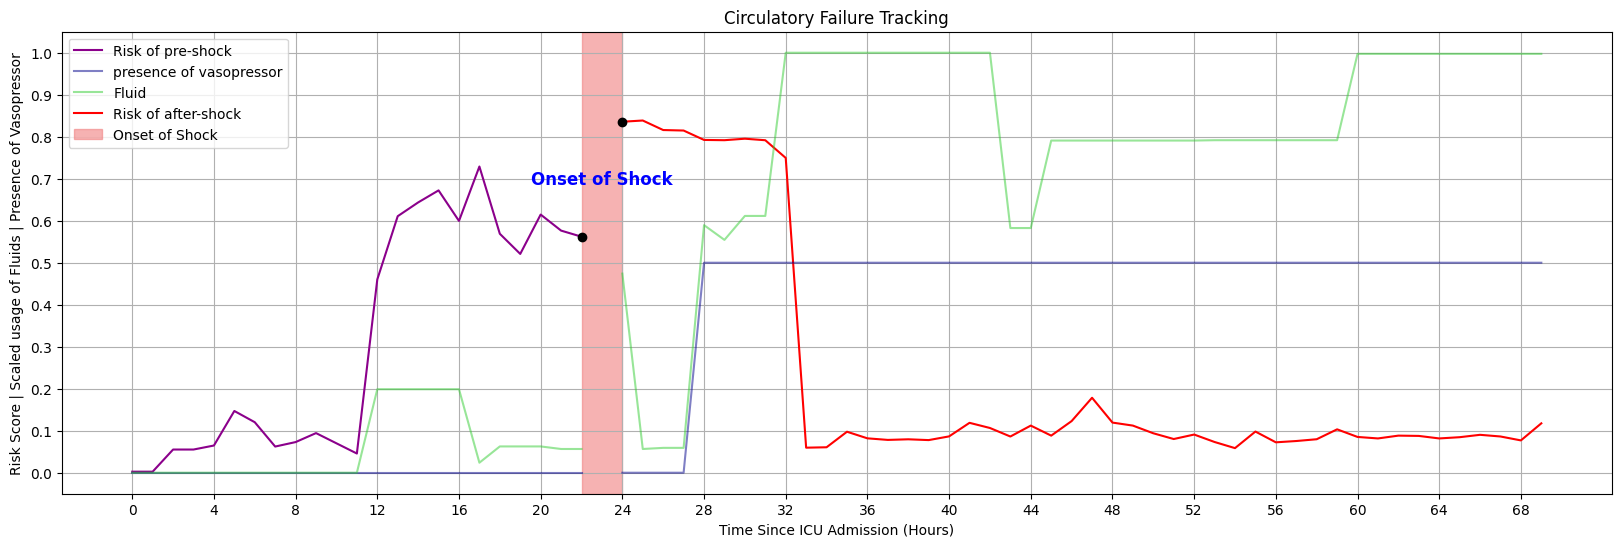

In [290]:
import matplotlib.pyplot as plt

interest = output_viz[output_viz['stay_id'] == high_f1_stay_ids[0]]
interest['Fluids(ml)_scaled'] = min_max_scaling(interest['Fluids(ml)'])
Case1_2 = interest.iloc[:23].drop(index = 15797, axis = 0)
Case3_4 = interest.iloc[23:]

plt.figure(figsize=(20, 6))

onset_of_shock_time = Case1_2['Time_since_ICU_admission'].iloc[-1]+1

# Case1_2
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['prediction_prob_case2'], linestyle='-', color='darkmagenta', label='Risk of pre-shock')
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['vasoactive/inotropic']/2, linestyle='-', color='darkblue', label='presence of vasopressor', alpha=0.5)
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['Fluids(ml)_scaled'], linestyle='-', color='limegreen', label='Fluid', alpha=0.5)

# Case3_4
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['prediction_prob_case4'], linestyle='-', color='red', label='Risk of after-shock')
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['vasoactive/inotropic']/2, linestyle='-', color='darkblue', alpha=0.5)
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['Fluids(ml)_scaled'], linestyle='-', color='limegreen', alpha=0.5)

# marker
plt.plot([Case1_2['Time_since_ICU_admission'].iloc[-1], Case3_4['Time_since_ICU_admission'].iloc[0]], [Case1_2['prediction_prob_case2'].iloc[-1], Case3_4['prediction_prob_case4'].iloc[0]], 'o', color='black')


plt.axvspan(onset_of_shock_time-1, onset_of_shock_time+1, color='lightcoral', alpha=0.6, label='Onset of Shock')
plt.text(onset_of_shock_time, 0.5 * (Case1_2['prediction_prob_case2'].iloc[-1] + Case3_4['prediction_prob_case4'].iloc[0]), 'Onset of Shock', ha='center', va='center', fontsize=12, color='blue', fontweight='bold')

xmin, xmax = 0, 69 
plt.xticks(range(xmin, xmax + 1, 4))

ymin, ymax = 0, 1 
plt.yticks(np.arange(ymin, ymax + 0.1, 0.1))

plt.title('Circulatory Failure Tracking')
plt.xlabel('Time Since ICU Admission (Hours)')
plt.ylabel('Risk Score | Scaled usage of Fluids | Presence of Vasopressor')

plt.grid(True)
plt.legend()
plt.show()

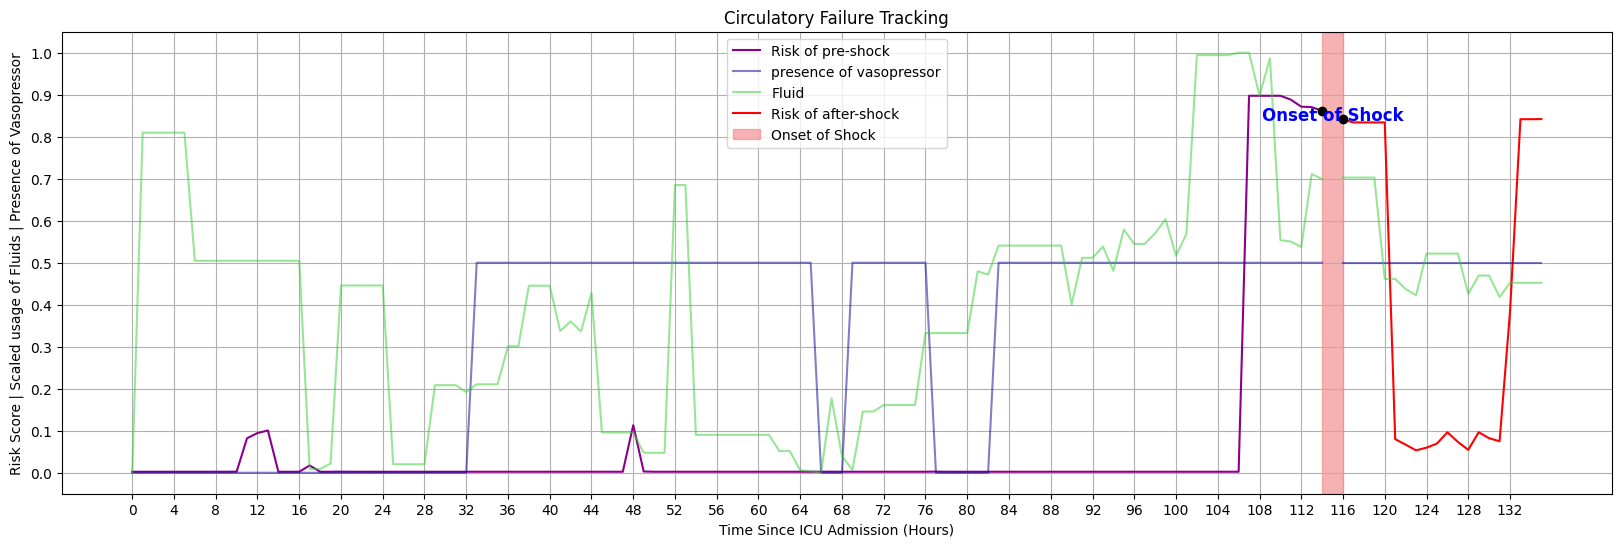

In [310]:
import matplotlib.pyplot as plt

interest = output_viz[output_viz['stay_id'] == high_f1_stay_ids[3]]
interest['Fluids(ml)_scaled'] = min_max_scaling(interest['Fluids(ml)'])
Case1_2 = interest.iloc[:115]
Case3_4 = interest.iloc[115:]

plt.figure(figsize=(20, 6))

onset_of_shock_time = Case1_2['Time_since_ICU_admission'].iloc[-1]+1

# Case1_2
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['prediction_prob_case2'], linestyle='-', color='darkmagenta', label='Risk of pre-shock')
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['vasoactive/inotropic']/2, linestyle='-', color='darkblue', label='presence of vasopressor', alpha=0.5)
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['Fluids(ml)_scaled'], linestyle='-', color='limegreen', label='Fluid', alpha=0.5)

# Case3_4
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['prediction_prob_case4'], linestyle='-', color='red', label='Risk of after-shock')
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['vasoactive/inotropic']/2, linestyle='-', color='darkblue', alpha=0.5)
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['Fluids(ml)_scaled'], linestyle='-', color='limegreen', alpha=0.5)

# marker
plt.plot([Case1_2['Time_since_ICU_admission'].iloc[-1], Case3_4['Time_since_ICU_admission'].iloc[0]], [Case1_2['prediction_prob_case2'].iloc[-1], Case3_4['prediction_prob_case4'].iloc[0]], 'o', color='black')


plt.axvspan(onset_of_shock_time-1, onset_of_shock_time+1, color='lightcoral', alpha=0.6, label='Onset of Shock')
plt.text(onset_of_shock_time, 0.5 * (Case1_2['prediction_prob_case2'].iloc[-1] + Case3_4['prediction_prob_case4'].iloc[0]), 'Onset of Shock', ha='center', va='center', fontsize=12, color='blue', fontweight='bold')

xmin, xmax = 0, 135 
plt.xticks(range(xmin, xmax + 1, 4))

ymin, ymax = 0, 1 
plt.yticks(np.arange(ymin, ymax + 0.1, 0.1))

plt.title('Circulatory Failure Tracking')
plt.xlabel('Time Since ICU Admission (Hours)')
plt.ylabel('Risk Score | Scaled usage of Fluids | Presence of Vasopressor')

plt.grid(True)
plt.legend()
plt.show()

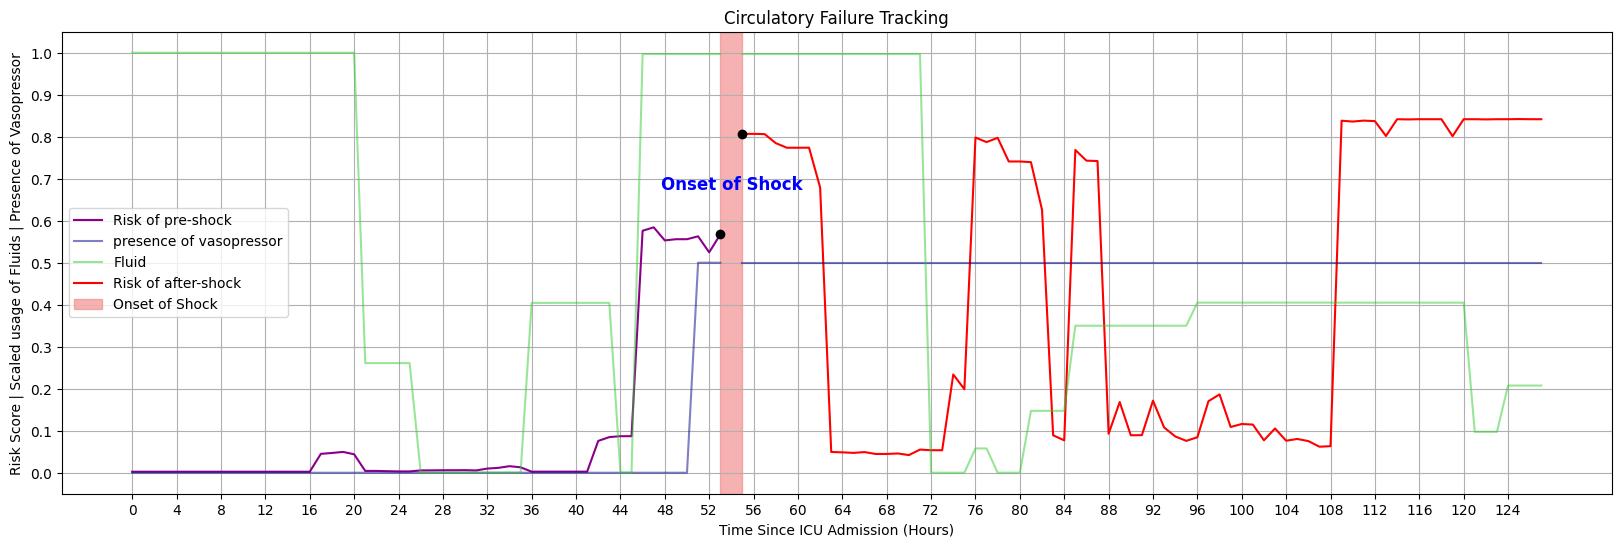

In [319]:
import matplotlib.pyplot as plt

interest = output_viz[output_viz['stay_id'] == high_f1_stay_ids[2]]
interest['Fluids(ml)_scaled'] = min_max_scaling(interest['Fluids(ml)'])
Case1_2 = interest.iloc[:54]
Case3_4 = interest.iloc[54:]

plt.figure(figsize=(20, 6))

onset_of_shock_time = Case1_2['Time_since_ICU_admission'].iloc[-1]+1

# Case1_2
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['prediction_prob_case2'], linestyle='-', color='darkmagenta', label='Risk of pre-shock')
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['vasoactive/inotropic']/2, linestyle='-', color='darkblue', label='presence of vasopressor', alpha=0.5)
plt.plot(Case1_2['Time_since_ICU_admission'], Case1_2['Fluids(ml)_scaled'], linestyle='-', color='limegreen', label='Fluid', alpha=0.5)

# Case3_4
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['prediction_prob_case4'], linestyle='-', color='red', label='Risk of after-shock')
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['vasoactive/inotropic']/2, linestyle='-', color='darkblue', alpha=0.5)
plt.plot(Case3_4['Time_since_ICU_admission'], Case3_4['Fluids(ml)_scaled'], linestyle='-', color='limegreen', alpha=0.5)

# marker
plt.plot([Case1_2['Time_since_ICU_admission'].iloc[-1], Case3_4['Time_since_ICU_admission'].iloc[0]], [Case1_2['prediction_prob_case2'].iloc[-1], Case3_4['prediction_prob_case4'].iloc[0]], 'o', color='black')


plt.axvspan(onset_of_shock_time-1, onset_of_shock_time+1, color='lightcoral', alpha=0.6, label='Onset of Shock')
plt.text(onset_of_shock_time, 0.5 * (Case1_2['prediction_prob_case2'].iloc[-1] + Case3_4['prediction_prob_case4'].iloc[0]), 'Onset of Shock', ha='center', va='center', fontsize=12, color='blue', fontweight='bold')

xmin, xmax = 0, 127 
plt.xticks(range(xmin, xmax + 1, 4))

ymin, ymax = 0, 1 
plt.yticks(np.arange(ymin, ymax + 0.1, 0.1))

plt.title('Circulatory Failure Tracking')
plt.xlabel('Time Since ICU Admission (Hours)')
plt.ylabel('Risk Score | Scaled usage of Fluids | Presence of Vasopressor')

plt.grid(True)
plt.legend()
plt.show()